In [8]:
!pip install openpyxl
! pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.8 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.8 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.8 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/9.8 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.8 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/9.8 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.7 MB/s eta 0:00:03
   ------- -------------------------------- 1.7/9.8 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.0/9.8 MB 4.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.2/9.8 MB 4.1 MB/s eta 0:00:02
   ---------- ------------

In [3]:
import pandas as pd

# Cargar datos desde el archivo Excel
file_path = 'Grupo_9.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Mostrar las hojas de cálculo disponibles
print(data.keys())


dict_keys(['Santa Ana', 'La Floresta'])


In [5]:
# Cargar datos de cada hoja
santa_ana = data['Santa Ana']
la_floresta = data['La Floresta']

# Mostrar las primeras filas para verificar
print(santa_ana.head())
print(la_floresta.head())



       Fecha        Ventas
0 2023-01-01   9628.330859
1 2023-01-02  14290.679435
2 2023-01-03  12818.232667
3 2023-01-04  17404.842772
4 2023-01-05  18919.685321
       Fecha        Ventas
0 2023-01-01  11645.100903
1 2023-01-02  13759.322193
2 2023-01-03  15873.983239
3 2023-01-04  17180.894218
4 2023-01-05  16358.073717


In [6]:
# Convertir la columna de fechas a datetime
santa_ana['Fecha'] = pd.to_datetime(santa_ana['Fecha'])
la_floresta['Fecha'] = pd.to_datetime(la_floresta['Fecha'])

# Agregar columnas para mes y día de la semana
santa_ana['Mes'] = santa_ana['Fecha'].dt.month
santa_ana['DiaSemana'] = santa_ana['Fecha'].dt.day_name()

la_floresta['Mes'] = la_floresta['Fecha'].dt.month
la_floresta['DiaSemana'] = la_floresta['Fecha'].dt.day_name()


# Paso 3: Funciones Empíricas de Distribución y Aproximaciones a las Funciones de Densidad
* Utilizaremos las ventas agrupadas por mes y por día de la semana para calcular las funciones empíricas de distribución y las densidades.
## Funciones Empíricas de Distribución

In [10]:
import statsmodels.api as sm

# Crear ECDF para las ventas mensuales y diarias
def create_ecdf(data):
    ecdf = sm.distributions.ECDF(data)
    return ecdf

# Ejemplo para las ventas de enero en Santa Ana
ventas_enero_santa_ana = santa_ana[santa_ana['Mes'] == 1]['Ventas']
ecdf_enero_santa_ana = create_ecdf(ventas_enero_santa_ana)

# Para las ventas de todos los meses y días de la semana, repetimos el proceso



## Aproximaciones a las Funciones de Densidad

In [11]:
from scipy.stats import gaussian_kde
import numpy as np

# Crear KDE para las ventas mensuales y diarias
def create_kde(data):
    kde = gaussian_kde(data)
    return kde

# Ejemplo para las ventas de enero en Santa Ana
kde_enero_santa_ana = create_kde(ventas_enero_santa_ana)


# Paso 4: Intervalos de Confianza Empíricos
* Calcular intervalos de confianza para las ventas mensuales y diarias.

In [12]:
# Calcular intervalos de confianza
def confidence_intervals(data, confidence_level):
    lower_bound = np.percentile(data, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(data, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

# Ejemplo para intervalos de confianza del 95% para ventas de enero en Santa Ana
ci_95_enero_santa_ana = confidence_intervals(ventas_enero_santa_ana, 0.95)
ci_99_enero_santa_ana = confidence_intervals(ventas_enero_santa_ana, 0.99)


# Paso 5: Pruebas de Hipótesis
* Realizar pruebas de hipótesis para comparar las ventas entre las dos tiendas.

In [13]:
from scipy.stats import ttest_ind

# Realizar prueba t de dos muestras
t_stat, p_value = ttest_ind(santa_ana['Ventas'], la_floresta['Ventas'], alternative='less')

# Resultados
print(f"Estadístico t: {t_stat}, p-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula al 95% de confianza")
if p_value < 0.01:
    print("Rechazamos la hipótesis nula al 99% de confianza")


Estadístico t: -9.857108820588982, p-valor: 6.6880386605289005e-22
Rechazamos la hipótesis nula al 95% de confianza
Rechazamos la hipótesis nula al 99% de confianza


# Paso 6: Generar gráficos y resultados
* Graficar los resultados para visualización.

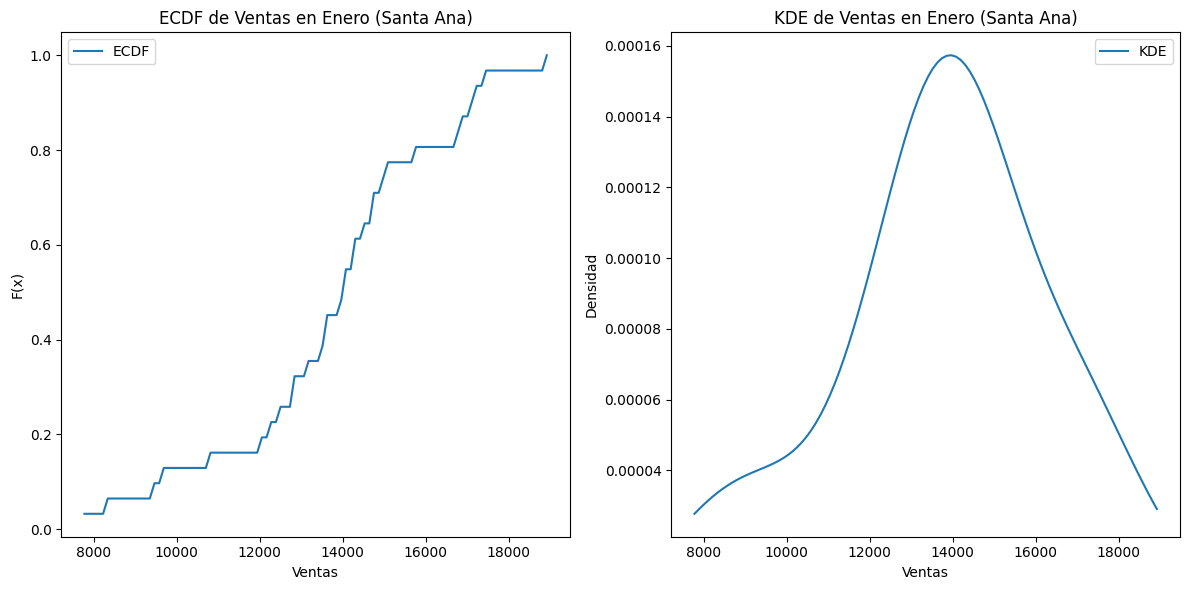

In [14]:
import matplotlib.pyplot as plt

# Graficar ECDF y KDE
x = np.linspace(min(ventas_enero_santa_ana), max(ventas_enero_santa_ana), 100)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, ecdf_enero_santa_ana(x), label='ECDF')
plt.title('ECDF de Ventas en Enero (Santa Ana)')
plt.xlabel('Ventas')
plt.ylabel('F(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, kde_enero_santa_ana(x), label='KDE')
plt.title('KDE de Ventas en Enero (Santa Ana)')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()


# Resumen del análisis mensual y semanal
* Realizar el análisis mensual y semanal para ambas tiendas.

In [15]:
def analyze_sales_by_month_and_day(data, store_name):
    results = {}
    # Análisis por mes
    for month in range(1, 13):
        monthly_sales = data[data['Mes'] == month]['Ventas']
        if not monthly_sales.empty:
            ecdf = create_ecdf(monthly_sales)
            kde = create_kde(monthly_sales)
            ci_95 = confidence_intervals(monthly_sales, 0.95)
            ci_99 = confidence_intervals(monthly_sales, 0.99)
            results[f'{store_name}_month_{month}'] = {
                'ecdf': ecdf,
                'kde': kde,
                'ci_95': ci_95,
                'ci_99': ci_99
            }
    # Análisis por día de la semana
    for day in data['DiaSemana'].unique():
        daily_sales = data[data['DiaSemana'] == day]['Ventas']
        if not daily_sales.empty:
            ecdf = create_ecdf(daily_sales)
            kde = create_kde(daily_sales)
            ci_95 = confidence_intervals(daily_sales, 0.95)
            ci_99 = confidence_intervals(daily_sales, 0.99)
            results[f'{store_name}_day_{day}'] = {
                'ecdf': ecdf,
                'kde': kde,
                'ci_95': ci_95,
                'ci_99': ci_99
            }
    return results

# Analizar ambas tiendas
santa_ana_results = analyze_sales_by_month_and_day(santa_ana, 'Santa_Ana')
la_floresta_results = analyze_sales_by_month_and_day(la_floresta, 'La_Floresta')


In [18]:
santa_ana_results

{'Santa_Ana_month_1': {'ecdf': <statsmodels.distributions.empirical_distribution.ECDF at 0x1ed7e507410>,
  'kde': <scipy.stats._kde.gaussian_kde at 0x1ed7e6cb470>,
  'ci_95': (8147.538695051619, 17783.553409309643),
  'ci_99': (7847.391940464076, 18692.45893842279)},
 'Santa_Ana_month_2': {'ecdf': <statsmodels.distributions.empirical_distribution.ECDF at 0x1ed7e5f19a0>,
  'kde': <scipy.stats._kde.gaussian_kde at 0x1ed7e64e480>,
  'ci_95': (12245.351970010148, 19997.849880905953),
  'ci_99': (11520.915488492601, 21021.566288376005)},
 'Santa_Ana_month_3': {'ecdf': <statsmodels.distributions.empirical_distribution.ECDF at 0x1ed7e64d790>,
  'kde': <scipy.stats._kde.gaussian_kde at 0x1ed7e64e4b0>,
  'ci_95': (15054.962294143948, 22967.584118189712),
  'ci_99': (14492.28931332954, 24044.037311196495)},
 'Santa_Ana_month_4': {'ecdf': <statsmodels.distributions.empirical_distribution.ECDF at 0x1ed7e6f85c0>,
  'kde': <scipy.stats._kde.gaussian_kde at 0x1ed7e9f02f0>,
  'ci_95': (11466.169077691